#### Que. We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

### Importing the libraries

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Creating a dataframe

In [20]:
d = {'Max': [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25], 'Min': [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]}
df = pd.DataFrame(data=d)

In [17]:
df

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


### Plotting the data

Text(0, 0.5, 'Min and max temperature')

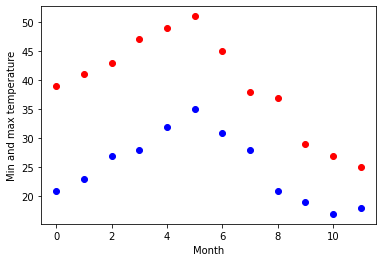

In [22]:
months = np.arange(12)
plt.plot(months, df.Max, 'ro')
plt.plot(months, df.Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

### Fitting it to a periodic function

In [26]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, df.Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, df.Min, [-40, 20, 0])

### Plotting the fit

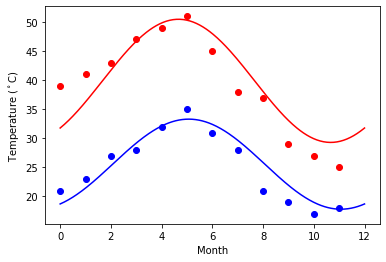

In [27]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, df.Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, df.Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Question 2

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [91]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [92]:
df.sex.isna().sum()

1

In [93]:
df.sex.describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

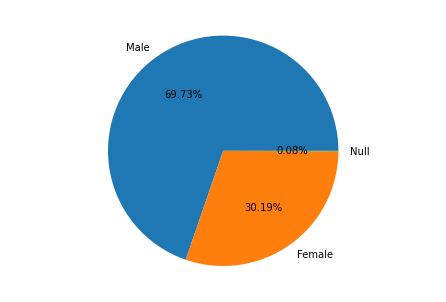

In [94]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male', 'Female', 'Null']
frequency = [843, 365, 1]
ax.pie(frequency, labels = gender,autopct='%1.2f%%')
plt.show()

#### Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [149]:
plt = pd.concat([df.iloc[:,3:5],df.iloc[:,8]],axis = 1)
plt

,sex,age,fare
0,female,29.0000,211.3375
1,male,0.9167,151.5500
2,female,2.0000,151.5500
3,male,30.0000,151.5500
4,female,25.0000,151.5500
...,...,...,...
1305,female,NaN,14.4542
1306,male,26.5000,7.2250
1307,male,27.0000,7.2250
1308,male,29.0000,7.8750


In [150]:
plt.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [151]:
plt.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [155]:
plt.sex = plt.sex.fillna('male')
plt.age = plt.age.fillna(29.881135)
plt.fare = plt.fare.fillna(33.295479)

In [156]:
gender = {'male': 0,'female': 1} 

In [158]:
plt.sex = [gender[item] for item in plt.sex] 
print(plt) 

      sex        age        fare
0       1  29.000000  211.337500
1       0   0.916700  151.550000
2       1   2.000000  151.550000
3       0  30.000000  151.550000
4       1  25.000000  151.550000
...   ...        ...         ...
1305    1  29.881135   14.454200
1306    0  26.500000    7.225000
1307    0  27.000000    7.225000
1308    0  29.000000    7.875000
1309    0  29.881135   33.295479

[1310 rows x 3 columns]


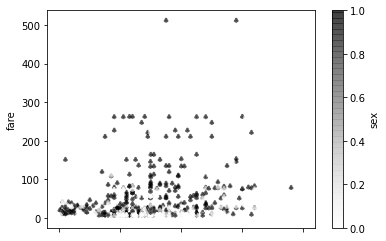

In [179]:
plt.plot.scatter(x='age', y='fare', c="sex", alpha=0.5, marker=r'$\clubsuit$')

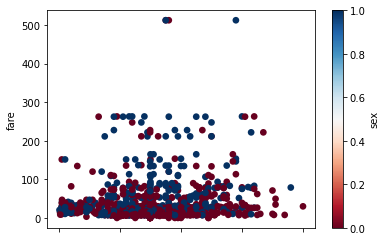

In [178]:
plt.plot.scatter('age', 'fare', c='sex', cmap='RdBu', edgecolor='None', s=45)